

# Objective
The goal of this data analysis project using sql would be to identify opportunities to increase the occupancy rate on low-performing flights, which can ultimately lead to increased profitability for the airline.


# Importing Libraries

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Database Connection

In [2]:
conn = sqlite3.connect(r"C:\Users\RaJat sharma\Downloads\Airlines Data Analysis Project Resources\travel.sqlite")
cursor = conn.cursor()

In [3]:
print('List of Tables')
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
table_list = [table[0] for table in cursor.fetchall()]
table_list

List of Tables


['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets']

# Data Exploration

In [4]:
aircrafts_data = pd.read_sql_query("SELECT * FROM aircrafts_data", conn)
aircrafts_data.head()

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600


In [5]:
aircrafts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   aircraft_code  9 non-null      object
 1   model          9 non-null      object
 2   range          9 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 348.0+ bytes


In [6]:
airports_data = pd.read_sql_query("SELECT * FROM airports_data", conn)
airports_data.head()

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin


In [7]:
airports_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   airport_code  104 non-null    object
 1   airport_name  104 non-null    object
 2   city          104 non-null    object
 3   coordinates   104 non-null    object
 4   timezone      104 non-null    object
dtypes: object(5)
memory usage: 4.2+ KB


In [8]:
boarding_passes = pd.read_sql_query("SELECT * FROM boarding_passes", conn)
boarding_passes.head()

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A


In [9]:
boarding_passes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579686 entries, 0 to 579685
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ticket_no    579686 non-null  object
 1   flight_id    579686 non-null  int64 
 2   boarding_no  579686 non-null  int64 
 3   seat_no      579686 non-null  object
dtypes: int64(2), object(2)
memory usage: 17.7+ MB


In [10]:
bookings = pd.read_sql_query("SELECT * FROM bookings ", conn)
bookings.head()

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600


In [11]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262788 entries, 0 to 262787
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   book_ref      262788 non-null  object
 1   book_date     262788 non-null  object
 2   total_amount  262788 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 6.0+ MB


In [12]:
flights = pd.read_sql_query("SELECT * FROM flights ", conn)
flights.head()

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N


In [13]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33121 entries, 0 to 33120
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   flight_id            33121 non-null  int64 
 1   flight_no            33121 non-null  object
 2   scheduled_departure  33121 non-null  object
 3   scheduled_arrival    33121 non-null  object
 4   departure_airport    33121 non-null  object
 5   arrival_airport      33121 non-null  object
 6   status               33121 non-null  object
 7   aircraft_code        33121 non-null  object
 8   actual_departure     33121 non-null  object
 9   actual_arrival       33121 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.5+ MB


In [14]:
seats = pd.read_sql_query("SELECT * FROM seats  ", conn)
seats.head()

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business


In [15]:
seats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   aircraft_code    1339 non-null   object
 1   seat_no          1339 non-null   object
 2   fare_conditions  1339 non-null   object
dtypes: object(3)
memory usage: 31.5+ KB


In [16]:
ticket_flights = pd.read_sql_query("SELECT * FROM ticket_flights  ", conn)
ticket_flights.head()

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100


In [17]:
ticket_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045726 entries, 0 to 1045725
Data columns (total 4 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   ticket_no        1045726 non-null  object
 1   flight_id        1045726 non-null  int64 
 2   fare_conditions  1045726 non-null  object
 3   amount           1045726 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 31.9+ MB


In [18]:
tickets = pd.read_sql_query("SELECT * FROM tickets  ", conn)
tickets.head()

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589


In [19]:
tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366733 entries, 0 to 366732
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ticket_no     366733 non-null  object
 1   book_ref      366733 non-null  object
 2   passenger_id  366733 non-null  object
dtypes: object(3)
memory usage: 8.4+ MB


# Analysis

In [20]:
seat_counts = seats.groupby('aircraft_code').size().reset_index(name='num_seats')
filtered_seat_counts = seat_counts[seat_counts['num_seats'] > 100]
ordered_seat_counts = filtered_seat_counts.sort_values(by='num_seats', ascending=False)
ordered_seat_counts


,aircraft_code,num_seats
5,773,402
4,763,222
2,321,170
1,320,140
3,733,130
0,319,116


**How the number of tickets booked and total amount earned changed with the time.**

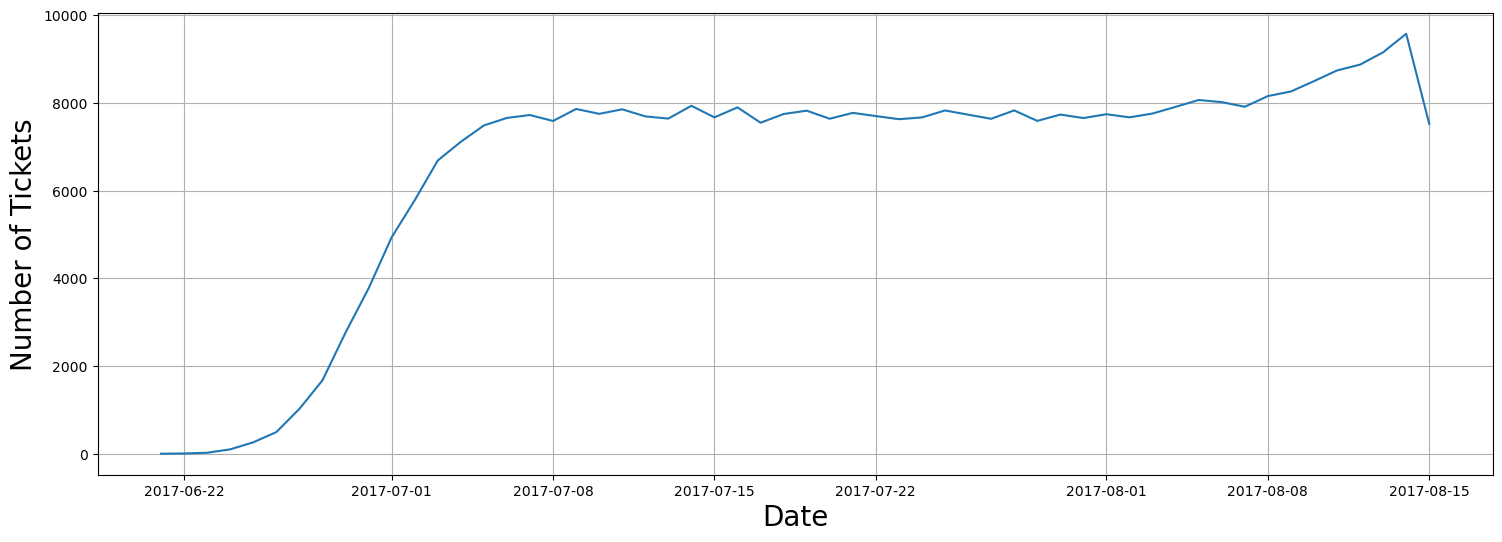

In [21]:
tickets_joined = pd.merge(tickets, bookings, on='book_ref')
tickets_joined['book_date'] = pd.to_datetime(tickets_joined['book_date'])
tickets_joined['date'] = tickets_joined['book_date'].dt.date
ticket_counts = tickets_joined.groupby('date').size().reset_index(name='num_tickets')
plt.figure(figsize=(18, 6))
plt.plot(ticket_counts['date'], ticket_counts['num_tickets'])
plt.xlabel('Date', fontsize=20)
plt.ylabel('Number of Tickets', fontsize=20)
plt.grid(True)

plt.show()


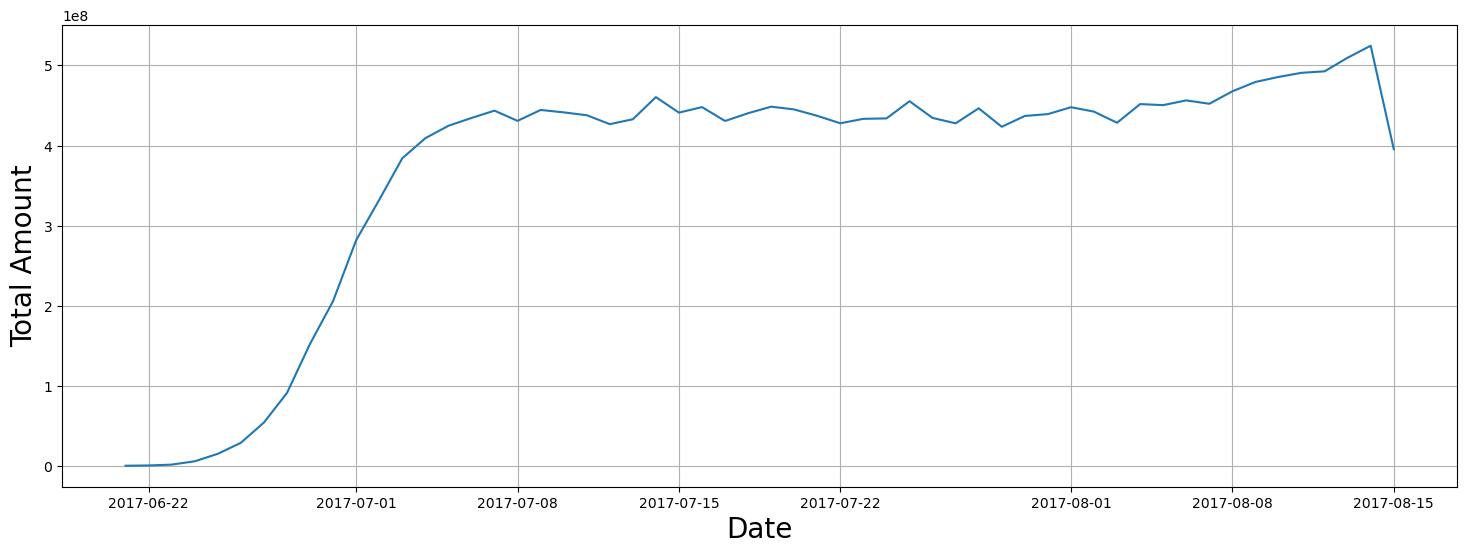

In [22]:
bookings['book_date'] = pd.to_datetime(bookings['book_date'])
bookings['date'] = bookings['book_date'].dt.date
y = bookings.groupby('date')['total_amount'].sum().reset_index()
plt.figure(figsize=(18,6))
plt.plot(y['date'], y['total_amount'])
plt.xlabel('Date', fontsize=20)
plt.ylabel('Total Amount', fontsize=20)
plt.grid(True)
plt.show()


**Calculate the average charges for each aircraft with different fare conditions.**

<Axes: xlabel='aircraft_code', ylabel='avg_amount'>

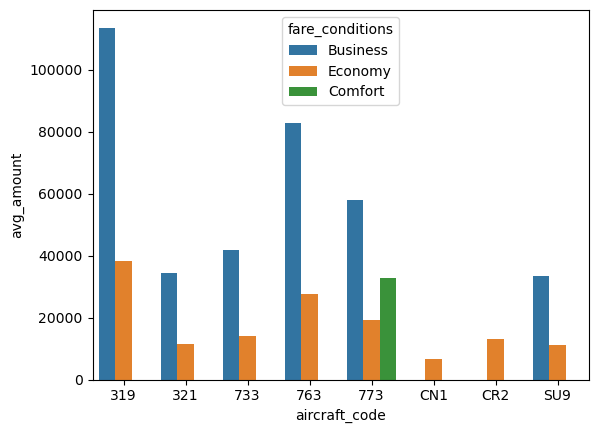

In [23]:

merged_df = pd.merge(ticket_flights, flights, on='flight_id')


grouped_df = merged_df.groupby(['aircraft_code', 'fare_conditions'])['amount'].mean().reset_index()
grouped_df.rename(columns={'amount': 'avg_amount'}, inplace=True)


sns.barplot(data=grouped_df, x='aircraft_code', y='avg_amount', hue='fare_conditions')


# Analyzing occupancy rate

**For each aircraft, calculate the total revenue per year and the average revenue per ticket.**

In [24]:
pd.set_option('display.float_format', str)

In [25]:
grouped_df = pd.merge(ticket_flights, flights, on='flight_id').groupby('aircraft_code').agg(
    ticket_count=('amount', 'count'),
    total_revenue=('amount', 'sum')
).reset_index()

grouped_df['avg_revenue_per_ticket'] = (grouped_df['total_revenue'] / grouped_df['ticket_count']).round()

grouped_df[['aircraft_code', 'total_revenue', 'ticket_count', 'avg_revenue_per_ticket']]



,aircraft_code,total_revenue,ticket_count,avg_revenue_per_ticket
0,319,2706163100,52853,51202.0
1,321,1638164100,107129,15292.0
2,733,1426552100,86102,16568.0
3,763,4371277100,124774,35034.0
4,773,3431205500,144376,23766.0
5,CN1,96373800,14672,6569.0
6,CR2,1982760500,150122,13208.0
7,SU9,5114484700,365698,13986.0


**Calculate the average occupancy per aircraft.**

In [26]:
a = boarding_passes.merge(flights, on='flight_id').groupby(['aircraft_code', 'flight_id']).size().reset_index(name='seats_count')
b = seats.groupby('aircraft_code').size().reset_index(name='num_seats')
merged_df = pd.merge(a, b, on='aircraft_code')
merged_df['booked_seats'] = merged_df['seats_count'].groupby(merged_df['aircraft_code']).transform('mean')
merged_df['occupancy_rate'] = merged_df['booked_seats'] / merged_df['num_seats']
occupancy_rate = merged_df[['aircraft_code', 'booked_seats', 'num_seats', 'occupancy_rate']].drop_duplicates()
occupancy_rate.reset_index()


,index,aircraft_code,booked_seats,num_seats,occupancy_rate
0,0,319,53.58318098720292,116,0.46192397402761143
1,547,321,88.80923076923077,170,0.5224072398190045
2,1197,733,80.25546218487395,130,0.617349709114415
3,1792,763,113.93729372937294,222,0.5132310528350132
4,2398,773,264.9258064516129,402,0.659019419033863
5,2708,CN1,6.004431314623338,12,0.5003692762186115
6,4062,CR2,21.48284690220174,50,0.42965693804403476
7,7968,SU9,56.81211267605634,97,0.5856918832583128


**Calculate by how much the total annual turnover could increase by giving all aircraft a 10% higher occupancy rate.**


In [27]:
occupancy_rate['Inc occupancy rate'] = occupancy_rate['occupancy_rate'] + occupancy_rate['occupancy_rate']*0.1
occupancy_rate.reset_index()

,index,aircraft_code,booked_seats,num_seats,occupancy_rate,Inc occupancy rate
0,0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726
1,547,321,88.80923076923077,170,0.5224072398190045,0.574647963800905
2,1197,733,80.25546218487395,130,0.617349709114415,0.6790846800258565
3,1792,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146
4,2398,773,264.9258064516129,402,0.659019419033863,0.7249213609372492
5,2708,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727
6,4062,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484382
7,7968,SU9,56.81211267605634,97,0.5856918832583128,0.644261071584144


In [28]:
total_revenue = ticket_flights.merge(flights, on='flight_id').groupby('aircraft_code').agg(total_revenue=('amount', 'sum')).reset_index()
merged_df = pd.merge(occupancy_rate, total_revenue, on='aircraft_code')
merged_df['Inc Total Annual Turnover'] = (merged_df['total_revenue'] / merged_df['occupancy_rate']) * merged_df['Inc occupancy rate']
merged_df['Inc Total Annual Turnover'] = round(merged_df['Inc Total Annual Turnover'], 0)
merged_df.drop(columns=['total_revenue'])


,aircraft_code,booked_seats,num_seats,occupancy_rate,Inc occupancy rate,Inc Total Annual Turnover
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726,2976779410.0
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905,1801980510.0
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565,1569207310.0
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146,4808404810.0
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372492,3774326050.0
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727,106011180.0
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484382,2181036550.0
7,SU9,56.81211267605634,97,0.5856918832583128,0.644261071584144,5625933170.0
